In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import json
from yellowbrick.classifier import ConfusionMatrix

In [17]:
le = LabelEncoder()
model = GaussianNB()
df = pd.read_csv('./credit_risk.csv')

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values


for i in range(X.shape[1]):
    X[:, i] = le.fit_transform(X[:, i])

with open('naive_byes.json', 'w') as f:
  f.write(json.dumps([X.tolist(), Y.tolist()])) 

Accuracy:  0.2


0.2

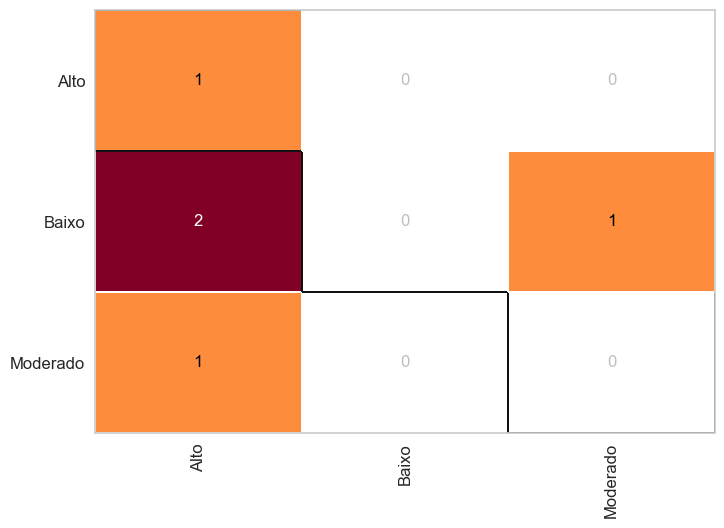

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(Y_test, Y_pred))
cm = ConfusionMatrix(model)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

In [19]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

        Alto       0.25      1.00      0.40         1
       Baixo       0.00      0.00      0.00         3
    Moderado       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.08      0.33      0.13         5
weighted avg       0.05      0.20      0.08         5



/Users/elioenai.ferrari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elioenai.ferrari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elioenai.ferrari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [20]:
model.predict([[0, 1, 0, 0], [1, 0, 1, 1], [2, 0, 1, 0]])

array(['Moderado', 'Alto', 'Alto'], dtype='<U8')